In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

c:\Users\asus\anaconda3\envs\myENV\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\asus\anaconda3\envs\myENV\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\asus\anaconda3\envs\myENV\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
data=np.load('stringer_spontaneous.npy',allow_pickle=True).item()
list(data.keys())

['sresp',
 'run',
 'beh_svd_time',
 'beh_svd_mask',
 'stat',
 'pupilArea',
 'pupilCOM',
 'xyz']

In [5]:
sresp=data['sresp']
pupilArea=data['pupilArea']
(pupilArea.T).shape



(1, 7018)

In [6]:
sresp.shape

(11983, 7018)

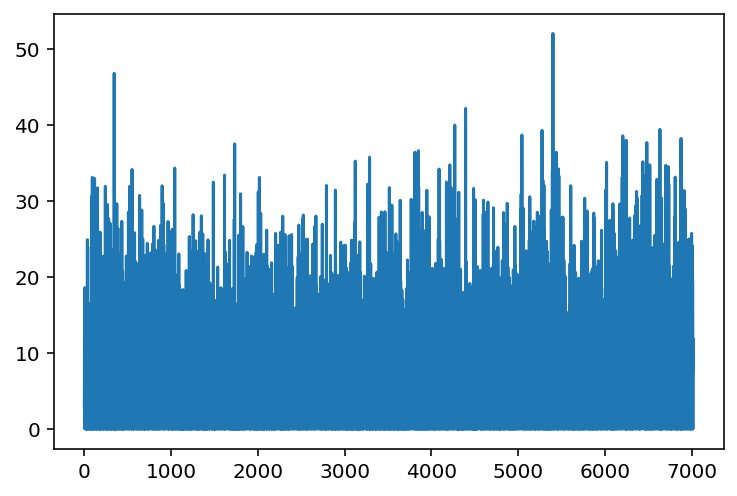

In [25]:
#plt.hist(sresp[0][:],bins=50,histtype='stepfilled')
plt.plot(sresp[0][:])

In [9]:
sres0=np.reshape(sresp[0],-1)
sres0.shape

(7018,)

(1, 7018)


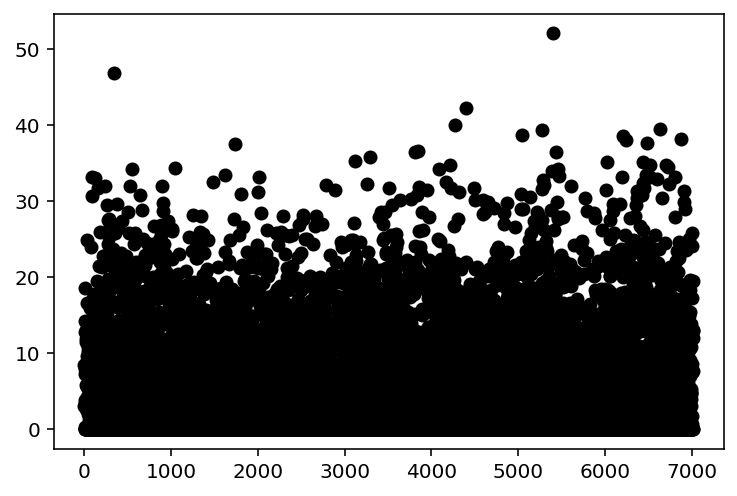

In [10]:
x=np.arange(0,7018,1)
x=np.expand_dims(x,axis=0)
print(x.shape)
plt.scatter(x,sresp[0],color='k')

[Text(0.5, 0, 'timepoints'), Text(0, 0.5, 'pupil Area')]

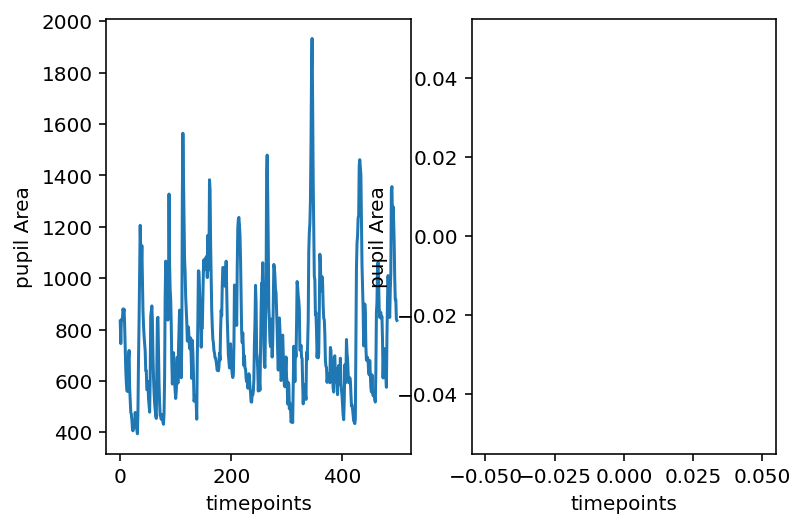

In [11]:
ax=plt.subplot(1,2,1)
plt.plot(pupilArea[:500,0])
ax.set(xlabel='timepoints',ylabel='pupil Area')

ax=plt.subplot(1,2,2)
plt.plot(x[:500,0])
ax.set(xlabel='timepoints',ylabel='pupil Area')

In [12]:
mean=np.mean(sresp)
mean

39.823532

In [13]:

def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    : Vector of eigenvalues
    evectors (numpy array of floats) : Corresponding matrix of eigenvectors
                                        each column corresponds to a different
                                        eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]
  return evals, evectors

In [14]:
def plot_data_new_basis(Y):
  """
  Plots bivariate data after transformation to new bases. Similar to plot_data
  but with colors corresponding to projections onto basis 1 (red) and
  basis 2 (blue).
  The title indicates the sample correlation calculated from the data.

  Note that samples are re-sorted in ascending order for the first random
  variable.

  Args:
    Y (numpy array of floats) : Data matrix in new basis each column
                                corresponds to a different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(Y[:, 0], 'r')
  plt.ylabel('Projection \n basis vector 1')
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(Y[:, 1], 'b')
  plt.xlabel('Sample number')
  plt.ylabel('Projection \n basis vector 2')
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(Y[:, 0], Y[:, 1], '.', color=[.5, .5, .5])
  ax3.axis('equal')
  plt.xlabel('Projection basis vector 1')
  plt.ylabel('Projection basis vector 2')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(Y[:, 0], Y[:, 1])[0, 1]))
  plt.show()

In [26]:
def pca(X):
  """
  Sorts eigenvalues and eigenvectors in decreasing order.

  Args:
    X (numpy array of floats): Data matrix each column corresponds to a
                               different random variable

  Returns:
    (numpy array of floats)  : Data projected onto the new basis
    (numpy array of floats)  : Vector of eigenvalues
    (numpy array of floats)  : Corresponding matrix of eigenvectors

  """

  #################################################
  ## TODO for students: calculate the covariance matrix
  # Fill out function and remove
  #raise NotImplementedError("Student exercise: sort eigenvalues/eigenvectors!")
  #################################################

  # Calculate the sample covariance matrix
  cov_matrix = np.matmul(X.T,X)

  # Calculate the eigenvalues and eigenvectors
  evals, evectors = np.linalg.eigh(cov_matrix)

  # Sort the eigenvalues in descending order
  evals, evectors = sort_evals_descending(evals,evectors)

  # Project the data onto the new eigenvector basis
  score = X@evectors

  return score, evectors, evals


# Perform PCA on the data matrix X
score, evectors, evals = pca(sresp)
print(evals)
print(score)

# Plot the data projected into the new basis
#plot_data_new_basis(score)

[2.1931909e+11 1.3155338e+10 1.1110115e+10 ... 4.8753838e+05 4.4001538e+05
 2.7664334e+05]
[[-5.75686340e+02  5.03125191e+01 -2.06681824e+01 ... -9.46861076e+00
   4.43865871e+00 -1.84446573e-03]
 [-4.50615143e+02 -1.27514734e+01 -3.37767296e+01 ... -7.18567491e-01
   5.26523495e+00  1.18763268e+00]
 [-3.88548798e+02 -1.42390232e+01 -1.82653713e+01 ... -6.11123919e-01
  -5.49887323e+00 -5.02636373e-01]
 ...
 [-2.73706030e+03 -1.63508881e+02 -1.15338776e+02 ... -1.28053713e+00
  -1.14197598e+01  1.00819397e+00]
 [-4.39596826e+03 -2.63240173e+02 -6.44130325e+00 ...  3.30915260e+00
   5.16394234e+00 -1.80250359e+00]
 [-2.34090302e+02 -7.05624151e+00 -1.16209602e+01 ... -2.86797142e+00
  -1.98441792e+00 -1.93734121e+00]]


In [40]:
print(evectors.shape)

(7018, 7018)


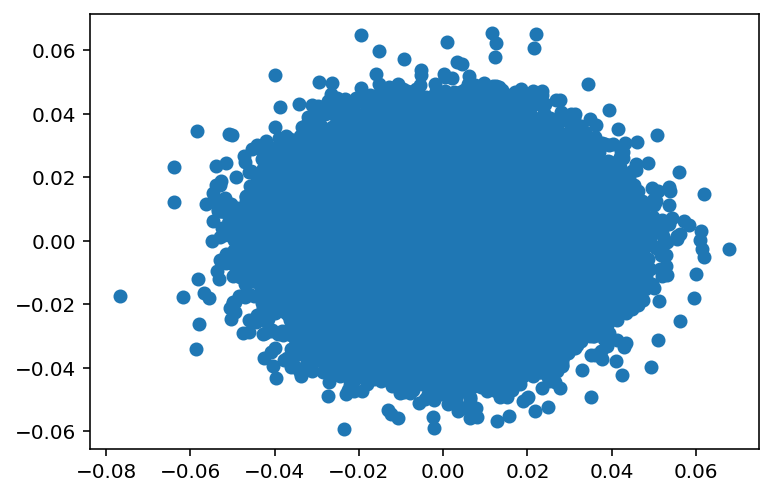

In [46]:
plt.scatter(evectors[:50],evectors[50:100])

In [1]:
plt.plot(evals[1])

NameError: name 'plt' is not defined

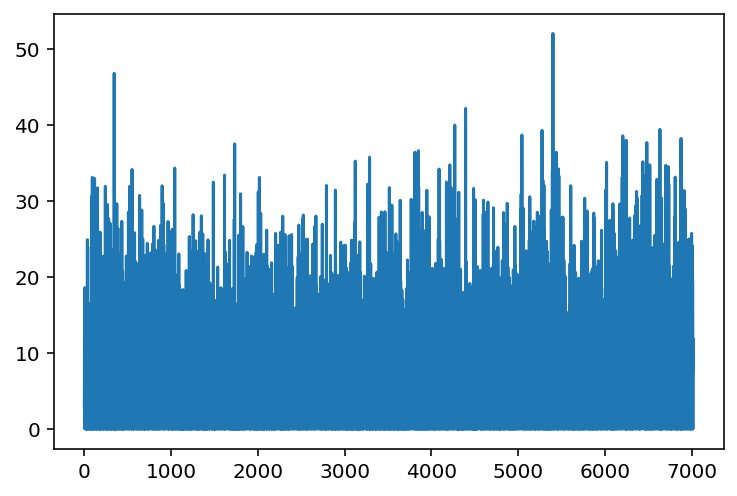

In [31]:
plt.plot(sresp[0,:])

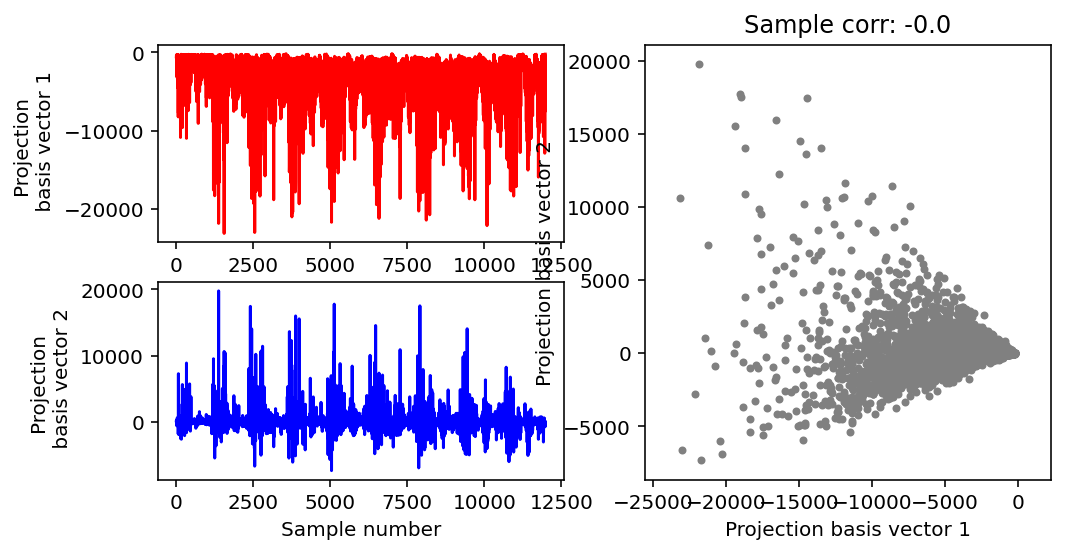

In [27]:
plot_data_new_basis(score)